In [2]:
from pandas import DataFrame, read_csv
from scipy import stats
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
%pylab inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.max_rows', 30)

Populating the interactive namespace from numpy and matplotlib


C:\Users\devin\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
df_nba = pd.read_csv('nba.games.stats.csv')
df_nba

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,FreeThrowsAttempted,FreeThrows.,OffRebounds,TotalRebounds,Assists,Steals,Blocks,Turnovers,TotalFouls,Opp.FieldGoals,Opp.FieldGoalsAttempted,Opp.FieldGoals.,Opp.3PointShots,Opp.3PointShotsAttempted,Opp.3PointShots.,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,80,0.500,13,22,0.591,9,17,0.529,10,42,26,6,8,17,24,37,90,0.411,8,26,0.308,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,69,0.507,7,20,0.350,25,33,0.758,3,37,26,10,6,12,20,31,81,0.383,12,32,0.375,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,92,0.413,8,25,0.320,8,11,0.727,10,37,26,14,5,13,25,31,69,0.449,5,17,0.294,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,93,0.462,13,33,0.394,20,26,0.769,7,38,28,8,3,19,33,48,97,0.495,6,21,0.286,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,81,0.407,9,22,0.409,28,36,0.778,12,41,18,10,5,8,17,40,84,0.476,8,21,0.381,8,11,0.727,13,44,26,2,6,15,29
5,6,ATL,6,2014-11-10,Away,NYK,W,91,85,27,71,0.380,10,27,0.370,27,28,0.964,9,38,20,7,3,15,16,36,83,0.434,6,26,0.231,7,12,0.583,11,40,23,4,2,15,26
6,7,ATL,7,2014-11-12,Home,UTA,W,100,97,39,76,0.513,9,20,0.450,13,18,0.722,13,46,23,8,4,18,12,43,86,0.500,5,23,0.217,6,12,0.500,8,30,28,12,8,11,17
7,8,ATL,8,2014-11-14,Home,MIA,W,114,103,42,75,0.560,11,28,0.393,19,23,0.826,3,36,33,10,5,13,20,35,74,0.473,10,21,0.476,23,25,0.920,5,32,27,10,3,14,20
8,9,ATL,9,2014-11-15,Away,CLE,L,94,127,40,90,0.444,3,22,0.136,11,13,0.846,11,37,26,6,8,18,12,49,90,0.544,19,31,0.613,10,13,0.769,12,47,39,12,2,13,14
9,10,ATL,10,2014-11-18,Home,LAL,L,109,114,41,85,0.482,9,27,0.333,18,23,0.783,13,38,22,7,3,10,17,47,87,0.540,6,17,0.353,14,22,0.636,13,44,24,7,0,11,24


In [5]:
def fig_scatter(xvalues, yvalues, title=''):
    # create a new figure
    fig = plt.figure()

    # plot to it
    plt.scatter(xvalues, yvalues, figure=fig, cmap = 'cool')
    if title:
        plt.title(title, figure=fig)
    return fig

In [8]:
indices = ['Games Played','Wins','Losses', 'Win Rate','Pace','Field Goal Percentage',
           '3 Point Field Goal Percentage','Average Point Differential',
           'Average Win Differential', 'Average Loss Differential', 'Average ORTG',
           'Average DRTG','Average PPG','Average Possessions','Cumulative Point Differential',
           'Cumulative Win Differential','Cumulative Loss Differential','Cumulative ORTG',
           'Cumulative DRTG','Cumulative Points','Cumulative Possessions', 'Cumulative Pace']
df_nba_wins = pd.DataFrame(columns=df_nba["Team"].unique(), index= indices)
df_nba_wins.fillna(0,inplace=True)
for index, row in df_nba.iterrows():
    #Increment Games Played
    df_nba_wins.loc['Games Played', row['Team']] += 1
    # Add Wins and Losses to appropriate column.
    # Calculate Point Differential. Point differentials is a possible measure of how 'hard' a team wins/loses by
    df_nba_wins.loc['Cumulative Point Differential', row['Team']] += row['TeamPoints'] - row['OpponentPoints']
    if(row['WINorLOSS'] == 'W'):
        df_nba_wins.loc['Wins', row['Team']] += 1
        df_nba_wins.loc['Cumulative Win Differential', row['Team']] += row['TeamPoints'] - row['OpponentPoints']
    else:
        df_nba_wins.loc['Losses', row['Team']] += 1
        df_nba_wins.loc['Cumulative Loss Differential', row['Team']] += row['TeamPoints'] - row['OpponentPoints']
    # Calculate average point differentials
    df_nba_wins.loc['Average Win Differential', row['Team']] = df_nba_wins.loc['Cumulative Win Differential', row['Team']] / df_nba_wins.loc['Wins', row['Team']]
    df_nba_wins.loc['Average Loss Differential', row['Team']] = df_nba_wins.loc['Cumulative Loss Differential', row['Team']] / df_nba_wins.loc['Losses', row['Team']]
    df_nba_wins.loc['Average Point Differential', row['Team']] = df_nba_wins.loc['Cumulative Point Differential', row['Team']] / df_nba_wins.loc['Games Played', row['Team']]
    #Add ORTG/DRTG to column
    tmPossessions = (.5 * ((row['FieldGoalsAttempted'] + .4 * row['FreeThrowsAttempted'] - 1.07 * (row['OffRebounds'] / (row['OffRebounds'] + row['Opp.TotalRebounds'] - row['Opp.OffRebounds'])) * (row['FieldGoalsAttempted'] - row['FieldGoals.']) + row['Turnovers']) + (row['Opp.FieldGoalsAttempted'] + .4 * row['Opp.FreeThrowsAttempted'] - 1.07 * (row['Opp.OffRebounds'] / (row['Opp.OffRebounds'] + row['TotalRebounds'] - row['OffRebounds'])) * (row['Opp.FieldGoalsAttempted'] - row['Opp.FieldGoals']) + row['Opp.Turnovers'])))
    oppPossessions = (.5 * ((row['Opp.FieldGoalsAttempted'] + .4 * row['Opp.FreeThrowsAttempted'] - 1.07 * (row['Opp.OffRebounds'] / (row['Opp.OffRebounds'] + row['TotalRebounds'] - row['OffRebounds'])) * (row['Opp.FieldGoalsAttempted'] - row['Opp.FieldGoals.']) + row['Opp.Turnovers']) + (row['FieldGoalsAttempted'] + .4 * row['FreeThrowsAttempted'] - 1.07 * (row['OffRebounds'] / (row['OffRebounds'] + row['Opp.TotalRebounds'] - row['Opp.OffRebounds'])) * (row['FieldGoalsAttempted'] - row['FieldGoals']) + row['Turnovers'])))

    df_nba_wins.loc['Cumulative ORTG', row['Team']] += 100 * row['TeamPoints'] / tmPossessions
    df_nba_wins.loc['Cumulative DRTG', row['Team']] += (row['OpponentPoints'] / oppPossessions) * 100
    df_nba_wins.loc['Cumulative Points', row['Team']] += row['TeamPoints']
    df_nba_wins.loc['Cumulative Possessions', row['Team']] += (.5 * ((row['FieldGoalsAttempted'] + .4 * row['FreeThrowsAttempted'] - 1.07 * (row['OffRebounds'] / (row['OffRebounds'] + row['Opp.TotalRebounds'] - row['Opp.OffRebounds'])) * (row['FieldGoalsAttempted'] - row['FieldGoals.']) + row['Turnovers']) + (row['Opp.FieldGoalsAttempted'] + .4 * row['Opp.FreeThrowsAttempted'] - 1.07 * (row['Opp.OffRebounds'] / (row['Opp.OffRebounds'] + row['TotalRebounds'] - row['OffRebounds'])) * (row['Opp.FieldGoalsAttempted'] - row['Opp.FieldGoals']) + row['Opp.Turnovers'])))
    # Calculate average ratings, PPG, and possessions
    df_nba_wins.loc['Average ORTG', row['Team']] = df_nba_wins.loc['Cumulative ORTG', row['Team']] / df_nba_wins.loc['Games Played', row['Team']]
    df_nba_wins.loc['Average DRTG', row['Team']] = df_nba_wins.loc['Cumulative DRTG', row['Team']] / df_nba_wins.loc['Games Played', row['Team']]
    df_nba_wins.loc['Average PPG', row['Team']] = df_nba_wins.loc['Cumulative Points', row['Team']] / df_nba_wins.loc['Games Played', row['Team']]
    df_nba_wins.loc['Average Possessions', row['Team']] = df_nba_wins.loc['Cumulative Possessions', row['Team']] / df_nba_wins.loc['Games Played', row['Team']]
    # Calculate pace
    df_nba_wins.loc['Cumulative Pace', row['Team']] += (tmPossessions + oppPossessions) / 2
    df_nba_wins.loc['Pace', row['Team']] = df_nba_wins.loc['Cumulative Pace', row['Team']] / df_nba_wins.loc['Games Played', row['Team']]
    # Calculate shot percentage
    df_nba_wins.loc['Field Goal Percentage', row['Team']] += row['FieldGoals.']
    df_nba_wins.loc['3 Point Field Goal Percentage', row['Team']] += row['X3PointShots.']


df_nba_wins.loc['Field Goal Percentage'] /= df_nba_wins.loc['Games Played']
df_nba_wins.loc['3 Point Field Goal Percentage'] /= df_nba_wins.loc['Games Played']

df_nba_wins.loc['Win Rate'] = df_nba_wins.loc['Wins'] / (df_nba_wins.loc['Wins'] + df_nba_wins.loc['Losses'])
#pd.to_numeric(df_nba_wins.loc['Games Played'], downcast = 'integer')
#pd.to_numeric(df_nba_wins.loc['Wins'], downcast = 'integer')
#pd.to_numeric(df_nba_wins.loc['Losses'], downcast = 'integer')
df_nba_wins = df_nba_wins.T
df_nba_wins

C:\Users\devin\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars
C:\Users\devin\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\devin\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


,Games Played,Wins,Losses,Win Rate,Pace,Field Goal Percentage,3 Point Field Goal Percentage,Average Point Differential,Average Win Differential,Average Loss Differential,Average ORTG,Average DRTG,Average PPG,Average Possessions,Cumulative Point Differential,Cumulative Win Differential,Cumulative Loss Differential,Cumulative ORTG,Cumulative DRTG,Cumulative Points,Cumulative Possessions,Cumulative Pace
ATL,328.0,175.0,153.0,0.533537,91.916376,0.456424,0.359146,0.682927,11.228571,-11.379085,111.887429,111.894680,102.975610,92.277072,224.0,1965.0,-1741.0,36699.076815,36701.455066,33776.0,30266.879532,30148.571418
BOS,328.0,196.0,132.0,0.597561,92.065590,0.447677,0.350351,2.396341,10.061224,-8.984848,113.861939,111.492483,104.777439,92.127416,786.0,1972.0,-1186.0,37346.716061,36569.534335,34367.0,30217.792323,30197.513613
BRK,328.0,107.0,221.0,0.326220,92.346897,0.448454,0.342183,-5.176829,9.476636,-12.271493,110.462526,117.011123,102.259146,92.720174,-1698.0,1014.0,-2712.0,36231.708373,38379.648439,33541.0,30412.217213,30289.782119
CHO,328.0,153.0,175.0,0.466463,91.776306,0.438326,0.346363,0.000000,12.052288,-10.537143,112.054924,112.062795,102.667683,91.748656,0.0,1844.0,-1844.0,36754.015151,36756.596812,33675.0,30093.559303,30102.628275
CHI,328.0,160.0,168.0,0.487805,90.843653,0.441729,0.352561,-1.271341,10.143750,-12.142857,112.663705,113.865097,102.057927,90.803451,-417.0,1623.0,-2040.0,36953.695150,37347.751880,33475.0,29783.532074,29796.718243
CLE,328.0,211.0,117.0,0.643293,90.123085,0.467232,0.370186,3.646341,12.165877,-11.717949,119.198131,115.052103,107.164634,90.132076,1196.0,2567.0,-1371.0,39096.986988,37737.089935,35150.0,29563.320961,29560.371892
DAL,328.0,149.0,179.0,0.454268,90.317749,0.448573,0.352076,-0.841463,11.093960,-10.776536,112.618512,114.363985,101.935976,90.687285,-276.0,1653.0,-1929.0,36938.871953,37511.386997,33435.0,29745.429535,29624.221830
DEN,328.0,149.0,179.0,0.454268,91.811653,0.454506,0.349796,-1.164634,10.771812,-11.100559,116.330090,116.727881,106.268293,91.506935,-382.0,1605.0,-1987.0,38156.269362,38286.745025,34856.0,30014.274573,30114.222322
DET,328.0,152.0,176.0,0.463415,90.126056,0.443095,0.345643,-0.414634,11.888158,-11.039773,113.186008,112.715236,101.390244,89.731511,-136.0,1807.0,-1943.0,37125.010560,36970.597382,33256.0,29431.935532,29561.346471
GSW,328.0,265.0,63.0,0.807927,94.140772,0.491774,0.396716,9.615854,14.664151,-11.619048,120.826387,110.520770,113.548780,94.096839,3154.0,3886.0,-732.0,39631.055041,36250.812717,37244.0,30863.763209,30878.173176


In [21]:
df_nba_wins.sort_values(by='3 Point Field Goal Percentage', ascending = False)

,Games Played,Wins,Losses,Win Rate,Pace,Field Goal Percentage,3 Point Field Goal Percentage,Average Point Differential,Average Win Differential,Average Loss Differential,Average ORTG,Average DRTG,Average PPG,Average Possessions,Cumulative Point Differential,Cumulative Win Differential,Cumulative Loss Differential,Cumulative ORTG,Cumulative DRTG,Cumulative Points,Cumulative Possessions,Cumulative Pace
GSW,328.0,265.0,63.0,0.807927,94.140772,0.491774,0.396716,9.615854,14.664151,-11.619048,120.826387,110.520770,113.548780,94.096839,3154.0,3886.0,-732.0,39631.055041,36250.812717,37244.0,30863.763209,30878.173176
SAS,328.0,230.0,98.0,0.701220,89.618773,0.470631,0.371942,6.728659,13.308696,-8.714286,116.324439,107.976283,103.695122,89.320408,2207.0,3061.0,-854.0,38154.415992,35416.220664,34012.0,29297.093836,29394.957674
CLE,328.0,211.0,117.0,0.643293,90.123085,0.467232,0.370186,3.646341,12.165877,-11.717949,119.198131,115.052103,107.164634,90.132076,1196.0,2567.0,-1371.0,39096.986988,37737.089935,35150.0,29563.320961,29560.371892
POR,328.0,185.0,143.0,0.564024,91.315641,0.454037,0.368116,1.783537,10.940541,-10.062937,115.861433,113.456088,105.375000,91.149928,585.0,2024.0,-1439.0,38002.550162,37213.596811,34563.0,29897.176492,29951.530295
WAS,328.0,179.0,149.0,0.545732,91.995971,0.467378,0.366738,0.652439,10.486034,-11.161074,114.079733,112.970973,104.600610,91.872817,214.0,1877.0,-1663.0,37418.152325,37054.479016,34309.0,30134.283978,30174.678398
LAC,328.0,202.0,126.0,0.615854,91.340078,0.472250,0.365622,3.798780,12.643564,-10.380952,117.327101,113.697488,107.219512,91.520630,1246.0,2554.0,-1308.0,38483.289051,37292.775939,35168.0,30018.766624,29959.545536
SAC,328.0,121.0,207.0,0.368902,91.573362,0.458466,0.364360,-4.262195,8.396694,-11.661836,111.813652,116.944349,102.390244,91.715316,-1398.0,1016.0,-2414.0,36674.877730,38357.746632,33584.0,30082.623672,30036.062788
TOR,328.0,215.0,113.0,0.655488,89.489644,0.461598,0.359957,4.890244,11.800000,-8.256637,119.272832,113.368236,106.301829,89.344316,1604.0,2537.0,-933.0,39121.488823,37184.781395,34867.0,29304.935784,29352.603103
UTA,328.0,177.0,151.0,0.539634,87.495307,0.456768,0.359576,2.564024,13.248588,-9.960265,114.271916,110.588689,99.417683,87.184739,841.0,2345.0,-1504.0,37481.188466,36273.090155,32609.0,28596.594439,28698.460584
IND,328.0,173.0,155.0,0.527439,90.911680,0.457591,0.359567,0.786585,10.653179,-10.225806,112.960451,112.131860,102.536585,90.931235,258.0,1843.0,-1585.0,37051.028033,36779.249927,33632.0,29825.444940,29819.031002


In [33]:
df_nba_wins['Average Point Differential'].mean()

4.810966440042345e-17

In [34]:
df_nba_wins.describe()

,Games Played,Wins,Losses,Win Rate,Pace,Average Point Differential,Average Win Differential,Average Loss Differential,Average ORTG,Average DRTG,Average PPG,Average Possessions,Cumulative Point Differential,Cumulative Win Differential,Cumulative Loss Differential,Cumulative ORTG,Cumulative DRTG,Cumulative Points,Cumulative Possessions,Cumulative Pace
count,30.0,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,328.0,164.000000,164.000000,0.500000,91.105554,4.810966e-17,10.881033,-10.972348,113.984471,113.984471,103.652337,91.105554,0.000000,1830.700000,-1830.700000,37386.906493,37386.906493,33997.966667,29882.621614,29882.621614
std,0.0,41.685191,41.685191,0.127089,1.522020,3.893336e+00,1.451337,1.183556,3.135551,2.461938,3.193213,1.606796,1277.014352,689.649494,611.901623,1028.460686,807.515701,1047.373776,527.029161,499.222462
min,328.0,99.000000,63.000000,0.301829,87.495307,-6.207317e+00,8.396694,-12.969432,107.773151,107.976283,99.304878,87.184739,-2036.000000,934.000000,-2970.000000,35349.593451,35416.220664,32572.000000,28596.594439,28698.460584
25%,328.0,129.500000,135.500000,0.394817,89.996493,-2.419207e+00,9.681973,-11.703920,111.929303,112.689924,101.794207,89.953049,-793.500000,1334.750000,-2153.250000,36712.811399,36962.295094,33388.500000,29504.599959,29518.849598
50%,328.0,161.000000,167.000000,0.490854,91.396006,-2.073171e-01,10.569606,-11.099987,113.098508,113.654489,102.821646,91.328432,-68.000000,1761.500000,-1857.500000,37096.310575,37278.672427,33725.500000,29955.725533,29977.889859
75%,328.0,192.500000,198.500000,0.586890,92.048185,2.522104e+00,11.902915,-10.264593,116.208688,115.364664,105.225610,92.239658,827.250000,2264.750000,-1388.000000,38116.449535,37839.609889,34514.000000,30254.607730,30191.804809
max,328.0,265.000000,229.000000,0.807927,94.140772,9.615854e+00,14.664151,-8.256637,120.826387,119.079462,113.548780,94.096839,3154.000000,3886.000000,-732.000000,39631.055041,39058.063549,37244.000000,30863.763209,30878.173176


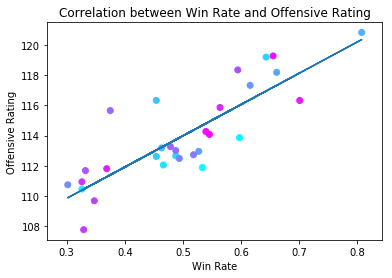

In [10]:
t = np.arange(len(df_nba_wins))
plt.scatter(df_nba_wins['Win Rate'], df_nba_wins['Average ORTG'], c=t, cmap='cool')
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Win Rate'], df_nba_wins['Average ORTG'], 1)
plt.plot(df_nba_wins['Win Rate'], b + m * df_nba_wins['Win Rate'])
plt.title('Correlation between Win Rate and Offensive Rating')
plt.xlabel('Win Rate')
plt.ylabel('Offensive Rating')
plt.show()

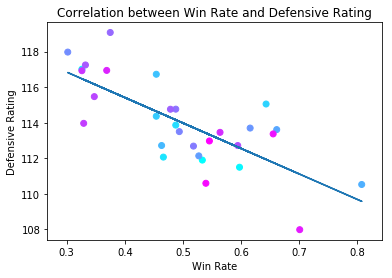

In [7]:
plt.scatter(df_nba_wins['Win Rate'], df_nba_wins['Average DRTG'], c=t, cmap='cool')
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Win Rate'], df_nba_wins['Average DRTG'], 1)
plt.plot(df_nba_wins['Win Rate'], b + m * df_nba_wins['Win Rate'])
plt.title('Correlation between Win Rate and Defensive Rating')
plt.xlabel('Win Rate')
plt.ylabel('Defensive Rating')
plt.show()


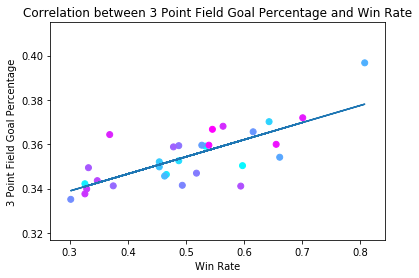

In [13]:
plt.scatter(df_nba_wins['Win Rate'], df_nba_wins['3 Point Field Goal Percentage'], c=t, cmap='cool')
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Win Rate'], df_nba_wins['3 Point Field Goal Percentage'], 1)
plt.plot(df_nba_wins['Win Rate'], b + m * df_nba_wins['Win Rate'])
plt.title('Correlation between 3 Point Field Goal Percentage and Win Rate')
plt.xlabel('Win Rate')
plt.ylabel('3 Point Field Goal Percentage')
plt.show()

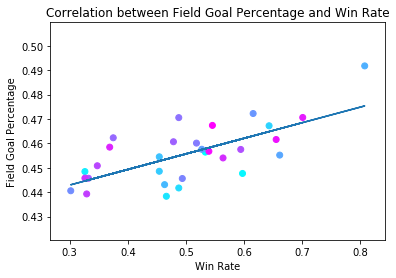

In [17]:
plt.scatter(df_nba_wins['Win Rate'], df_nba_wins['Field Goal Percentage'], c=t, cmap='cool')
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Win Rate'], df_nba_wins['Field Goal Percentage'], 1)
plt.plot(df_nba_wins['Win Rate'], b + m * df_nba_wins['Win Rate'])
plt.title('Correlation between Field Goal Percentage and Win Rate')
plt.xlabel('Win Rate')
plt.ylabel('Field Goal Percentage')
plt.show()

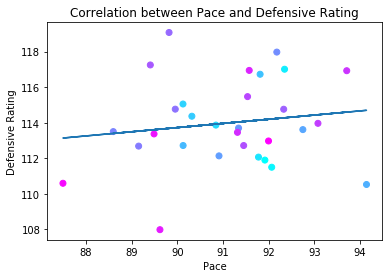

In [35]:
plt.scatter(df_nba_wins['Pace'], df_nba_wins['Average DRTG'], c=t, cmap='cool')
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Pace'], df_nba_wins['Average DRTG'], 1)
plt.plot(df_nba_wins['Pace'], b + m * df_nba_wins['Pace'])
plt.title('Correlation between Pace and Defensive Rating')
plt.xlabel('Pace')
plt.ylabel('Defensive Rating')
plt.show()

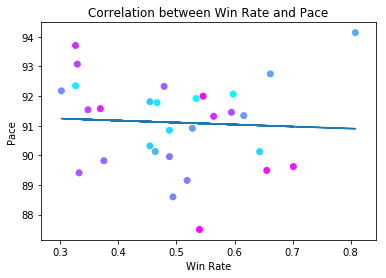

In [8]:
t = np.arange(len(df_nba_wins))
plt.scatter(df_nba_wins['Win Rate'], df_nba_wins['Pace'], c=t, cmap='cool')
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Win Rate'], df_nba_wins['Pace'], 1)
plt.plot(df_nba_wins['Win Rate'], b + m * df_nba_wins['Win Rate'])
plt.title('Correlation between Win Rate and Pace')
plt.xlabel('Win Rate')
plt.ylabel('Pace')
plt.show()

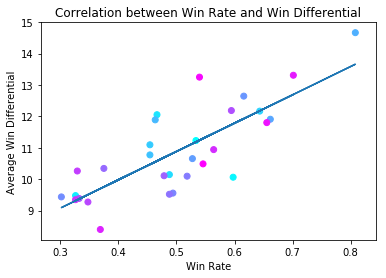

In [25]:
t = np.arange(len(df_nba_wins))
plt.scatter(df_nba_wins['Win Rate'], df_nba_wins['Average Win Differential'], c=t, cmap='cool')
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Win Rate'], df_nba_wins['Average Win Differential'], 1)
plt.plot(df_nba_wins['Win Rate'], b + m * df_nba_wins['Win Rate'])
plt.title('Correlation between Win Rate and Win Differential')
plt.xlabel('Win Rate')
plt.ylabel('Average Win Differential')
plt.show()

In [ ]:
t = np.arange(len(df_nba_wins))
plt.scatter(df_nba_wins['Win Rate'], df_nba_wins['Average Win Differential'], c=t, cmap='cool')
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Win Rate'], df_nba_wins['Average Win Differential'], 1)
plt.plot(df_nba_wins['Win Rate'], b + m * df_nba_wins['Win Rate'])
plt.title('Correlation between Win Rate and Win Differential')
plt.xlabel('Win Rate')
plt.ylabel('Average Win Differential')
plt.show()

In [15]:
print('Average Possessions on Average DRTG Correlation Coefficient: ', np.corrcoef(df_nba_wins['Average Possessions'], df_nba_wins['Average DRTG'])[0, 1])
print('Average Win Differential Correlation Coefficient: ', np.corrcoef(df_nba_wins['Win Rate'], df_nba_wins['Average Win Differential'])[0, 1])
print('Average ORTG Correlation Coefficient: ', np.corrcoef(df_nba_wins['Win Rate'], df_nba_wins['Average ORTG'])[0, 1])
print('Average PPG Correlation Coefficient: ', np.corrcoef(df_nba_wins['Win Rate'], df_nba_wins['Average PPG'])[0, 1])
print('Average DRTG Correlation Coefficient: ', np.corrcoef(df_nba_wins['Win Rate'], df_nba_wins['Average DRTG'])[0, 1])
print('Pace Correlation Coefficient: ', np.corrcoef(df_nba_wins['Win Rate'], df_nba_wins['Pace'])[0, 1])
print('3 Point Field Goal Percentage Correlation Coefficient: ', np.corrcoef(df_nba_wins['Win Rate'], df_nba_wins['3 Point Field Goal Percentage'])[0, 1])
print('Field Goal Percentage Correlation Coefficient: ', np.corrcoef(df_nba_wins['Win Rate'], df_nba_wins['Field Goal Percentage'])[0, 1])


Average Possessions on Average DRTG Correlation Coefficient:  0.193848974047
Average Win Differential Correlation Coefficient:  0.790159659824
Average ORTG Correlation Coefficient:  0.838431185559
Average PPG Correlation Coefficient:  0.6910274354
Average DRTG Correlation Coefficient:  -0.739720383619
Pace Correlation Coefficient:  -0.0562648266294
3 Point Field Goal Percentage Correlation Coefficient:  0.748028612537
Field Goal Percentage Correlation Coefficient:  0.684577281436


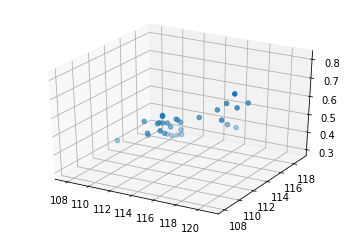

In [11]:
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(df_nba_wins['Average ORTG'], df_nba_wins['Average DRTG'], df_nba_wins['Win Rate'])
b, m = np.polynomial.polynomial.polyfit(df_nba_wins['Win Rate'], df_nba_wins['Average ORTG'], 1)
#ax.plot(df_nba_wins['Win Rate'], b + m * df_nba_wins['Win Rate'])


t = np.arange(df_nba_wins['Win Rate'].shape[0])  # simple assumption that data was sampled in regular steps

fitx = np.polyfit(t, df_nba_wins['Average ORTG'], 4)
fity = np.polyfit(t, df_nba_wins['Win Rate'], 4)
fitz = np.polyfit(t, df_nba_wins['Average DRTG'], 4)


In [12]:
df_league = pd.read_csv('LeagueofLegends.csv')
df_league

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,goldblue,bKills,bTowers,bInhibs,bDragons,bBarons,bHeralds,goldred,rKills,rTowers,rInhibs,rDragons,rBarons,rHeralds,blueTop,blueTopChamp,goldblueTop,blueJungle,blueJungleChamp,goldblueJungle,blueMiddle,blueMiddleChamp,goldblueMiddle,blueADC,blueADCChamp,goldblueADC,blueSupport,blueSupportChamp,goldblueSupport,blueBans,redTop,redTopChamp,goldredTop,redJungle,redJungleChamp,goldredJungle,redMiddle,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...","[2415, 2415, 2711, 3887, 5068, 6171, 7412, 866...","[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8...","[[27.542, 'MID_LANE', 'BASE_TURRET'], [39.269,...","[[36.686, 'MID_LANE'], [29.274, 'MID_LANE']]","[[37.267, None]]",[],[],"[2415, 2415, 2725, 3952, 5336, 6602, 7900, 945...","[[16.529, 'TSM Lustboy', 'C9 Balls', ['C9 Mete...","[[39.23, 'TOP_LANE', 'INNER_TURRET'], [20.681,...",[],"[[17.14, None], [30.934, None], [24.641, None]]",[[29.954]],[],Dyrus,Irelia,"[475, 475, 532, 687, 893, 1058, 1172, 1471, 18...",Santorin,RekSai,"[475, 475, 532, 870, 1049, 1276, 1596, 1815, 2...",Bjergsen,Ahri,"[475, 475, 532, 807, 1102, 1307, 1651, 1950, 2...",WildTurtle,Jinx,"[475, 475, 532, 797, 1127, 1453, 1766, 2044, 2...",Lustboy,Janna,"[515, 515, 583, 726, 897, 1077, 1227, 1381, 15...","['Rumble', 'Kassadin', 'Lissandra']",Balls,Gnar,"[475, 475, 532, 728, 958, 1284, 1526, 1912, 21...",Meteos,Elise,"[475, 475, 532, 898, 1192, 1429, 1819, 2107, 2...",Hai,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...","[2415, 2415, 2705, 4108, 5511, 6797, 7637, 895...","[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I...","[[23.239, 'BOT_LANE', 'OUTER_TURRET'], [33.018...",[],"[[32.545, None], [26.177, None], [19.119, None]]",[[29.255]],[],"[2415, 2415, 2731, 4126, 5364, 6560, 7789, 893...","[[12.387, 'CST Jesiz', 'DIG Gamsu', ['DIG Ship...","[[19.257, 'MID_LANE', 'OUTER_TURRET'], [15.206...","[[36.813, 'MID_LANE']]","[[12.264, None]]",[],[],Cris,Gnar,"[475, 475, 532, 791, 1127, 1509, 1674, 1875, 2...",Impaler,Rengar,"[475, 475, 532, 895, 1176, 1334, 1447, 1859, 2...",Jesiz,Ahri,"[475, 475, 532, 816, 1102, 1413, 1624, 1937, 2...",Mash,Caitlyn,"[475, 475, 532, 856, 1182, 1468, 1653, 1890, 2...",Sheep,Leona,"[515, 515, 577, 750, 924, 1073, 1239, 1392, 15...","['Kassadin', 'Sivir', 'Lissandra']",Gamsu,Irelia,"[475, 475, 532, 811, 1042, 1237, 1625, 1852, 2...",Crumbzz,JarvanIV,"[475, 475, 532, 909, 1105, 1423, 1536, 1732, 1...",Shiphtur,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...","[2415, 2415, 2726, 3794, 4933, 6236, 8109, 965...","[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho...","[[15.045, 'BOT_LANE', 'OUTER_TURRET'], [39.566...","[[37.511, 'TOP_LANE'], [37.38, 'BOT_LANE'], [3...","[[24.577, None], [37.867, None], [30.87, None]...",[[35.144]],[],"[2415, 2415, 2716, 3854, 4899, 6199, 7520, 859...","[[8.449, 'WFX Altec', 'GV Cop', ['GV BunnyFuFu...","[[24.62, 'MID_LANE', 'OUTER_TURRET'], [30.493,...",[],[],[],[],Flaresz,Renekton,"[475, 475, 533, 673, 828, 1075, 1428, 1775, 21...",ShorterACE,Rengar,"[475, 475, 543, 836, 1041, 1261, 1568, 2002, 2...",Pobelter,Fizz,"[475, 475, 533, 756, 1065, 1368, 2056, 2237, 2...",Altec,Sivir,"[475, 475, 533, 811, 1130

In [13]:
#normalized_df_league=(df_league-df_league.mean())/df_league.std()
#normalized_df_league
min_max_scaler = preprocessing.MinMaxScaler()
df_league['goldblue'].split()
#preprocessing.normalize(df_league['goldblue'])
#np_scaled = min_max_scaler.fit_transform(df_league)
#df_league_normalized = pd.DataFrame(np_scaled)
#df_league_normalized

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
pd.set_option('display.max_colwidth', -1)

In [ ]:
df_league['goldblue']

In [ ]:
pd.set_option('display.max_colwidth', 50)